## Final Project Submission

Please fill out:
* Student name: Luay Matalka
* Student pace: full time
* Scheduled project review date/time: 5/4/2020/ 4 PM Central
* Instructor name: Amber Yandow
* Blog post URL:


 ## Methodology
__OSEMN Methodology__:

- __Obtain__ - This step involves understanding stakeholder requirements, gathering information on the problem, and finally, sourcing data that we think will be necessary for solving this problem.
- __Scrub__ - During this stage, we'll focus on preprocessing our data. Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.
- __Explore__ -  During this step, you'll create visualizations to really get a feel for your dataset. You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks like that.
- __Model__ -  It consists of building and tuning models using all the tools you have in your data science toolbox. In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.
- __Interpret__ - During this step, you'll interpret the results of your model(s), and communicate results to stakeholders. If your results are satisfactory to all stakeholders involved, you may also go from this stage right into putting your model into production and automating processes necessary to support it.

## Questions to answer:

__1) Does renovation raise the value of a house?__

__2) Does the number of bathrooms and/or bedrooms affect the value of a house?__

__3) Is the living sqft of a house correlated with its price?__

__4) Does being on the water increase the value of a house?__

## Obtain:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import scipy
import scipy.stats as stats

In [2]:
# Read the data and convert it into a dataframe

main_df = pd.read_csv('zippedData/kc_house_data.csv')

## Scrub:

In [3]:
# View information about the data within our dataframe

main_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
# View data about our dataframe

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
# View the names of our columns

main_df.columns

# waterfront, view, yr_renovated missing some values

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
main_df['waterfront'].isnull().sum() 

# 2376 null values in waterfront

2376

In [7]:
main_df['view'].isnull().sum()

# 63 null values in waterfront

63

In [8]:
main_df['yr_renovated'].isnull().sum()

# 3842 null values in yr_renovated

3842

In [9]:
main_df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
65.0          1
2500.0        1
475.0         1
3480.0        1
666.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
# ?'s in sqft_basement. Can drop the entire column and replace it with sqft_living - sqft_above values:

main_df.drop(columns='sqft_basement', inplace=True)
main_df['sqft_basement'] = main_df['sqft_living'] - main_df['sqft_above']

In [11]:
# Check if the above worked:

main_df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [12]:
# View the top 5 rows of main_df

main_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639,400
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,1933,NaN,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,1965,0.0,98136,47.5208,-122.393,1360,5000,910
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,1987,0.0,98074,47.6168,-122.045,1800,7503,0


In [13]:
# Addressing yr_renovated by looking at the value_counts:

main_df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
# Will create a new column, was_renovated, with 0's and 1's to indicate whether it was renovated
# or not. Will assume all nulls are 0's.

main_df['was_renovated'] = [int(bool(x)) for x in main_df['yr_renovated']]

In [15]:
# Check if was_renovated column was added

main_df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement,was_renovated
308,7171200445,2/28/2015,550700.0,2,1.00,1010,5000,1.5,0.0,0.0,...,1010,1908,0.0,98105,47.6692,-122.297,1460,5000,0,0
9785,4068300160,1/22/2015,263500.0,3,1.75,1610,14000,1.0,0.0,0.0,...,1050,1977,NaN,98010,47.3429,-122.036,1550,10080,560,1
1805,2025770560,11/3/2014,930000.0,4,4.25,5710,24663,2.0,0.0,0.0,...,5710,2007,0.0,98092,47.3065,-122.158,4060,23847,0,0
14511,4311700120,3/17/2015,105000.0,3,1.00,880,18109,1.0,NaN,0.0,...,880,1970,NaN,98042,47.3634,-122.101,940,11193,0,1
15503,7701960250,8/11/2014,890000.0,4,2.75,3220,15467,2.0,0.0,0.0,...,3220,1994,0.0,98077,47.7128,-122.083,3670,16641,0,0


In [16]:
# Drop unnecessary columns

main_df.drop(columns=['id', 'yr_renovated'], inplace = True)

In [17]:
main_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement,was_renovated
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,400,1
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,1
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,910,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0


In [18]:
# Convert null values in waterfront to 0's:

main_df['waterfront'] = main_df['waterfront'].apply(lambda x: 1 if (x) else 0)

In [19]:
# Confirm that all nulls were removed

main_df['waterfront'].isnull().sum()

0

In [20]:
# Check that all nulls were converted into 0's

main_df['waterfront'].value_counts()

0    19075
1     2522
Name: waterfront, dtype: int64

In [21]:
# Convert all view null values to 0's

main_df['view'] = main_df['view'].apply(lambda x: x if (x == True) else 0)

In [22]:
# Confirm that all null values were removed

main_df['view'].isnull().sum()

0

In [23]:
# Confirm that all null values have been removed

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sqft_basement    21597 non-null int64
was_renovated    21597 non-null int64
dtypes: float64(6), int64(13), object(1)
memory usage: 3.3+ MB


In [24]:
# Convert the date column to a datetime object

main_df['date'] = pd.to_datetime(main_df['date'],infer_datetime_format=True)

In [25]:
# Confirm that the date column is now a datetime object

main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sqft_basement    21597 non-null int64
was_renovated    21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(13)
memory usage: 3.3 MB


In [26]:
main_df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement,was_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,1,0.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650,0,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639,400,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062,0,1
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000,910,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0.0,3,8,1530,2009,98103,47.6993,-122.346,1530,1509,0,0
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0.0,3,8,2310,2014,98146,47.5107,-122.362,1830,7200,0,0
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0.0,3,7,1020,2009,98144,47.5944,-122.299,1020,2007,0,0
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,1,0.0,3,8,1600,2004,98027,47.5345,-122.069,1410,1287,0,0


In [27]:
# Check the years of sales

main_df['date'].dt.year.value_counts()

2014    14622
2015     6975
Name: date, dtype: int64

In [28]:
# Since only 2 years are showing, will drop the column

main_df.drop(columns='date', inplace=True)

In [29]:
# Check that the column was dropped

main_df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement,was_renovated
16722,1190000.0,7,3.50,3890,8342,2.0,0,0.0,3,9,2840,1968,98117,47.7011,-122.392,2870,8342,1050,0
16474,1130000.0,5,3.00,3690,10260,1.0,0,0.0,4,9,2070,1967,98005,47.5919,-122.176,3160,14000,1620,0
7228,627000.0,5,3.25,3570,5425,2.0,0,0.0,3,7,3570,2005,98075,47.5933,-122.007,2690,5347,0,0
15781,315000.0,4,2.50,3130,5999,2.0,0,0.0,3,7,3130,2006,98042,47.3837,-122.099,3020,5997,0,0
2312,1400000.0,4,2.50,2770,8879,2.0,0,0.0,3,9,2770,2001,98004,47.5831,-122.193,2770,8882,0,0


## Explore

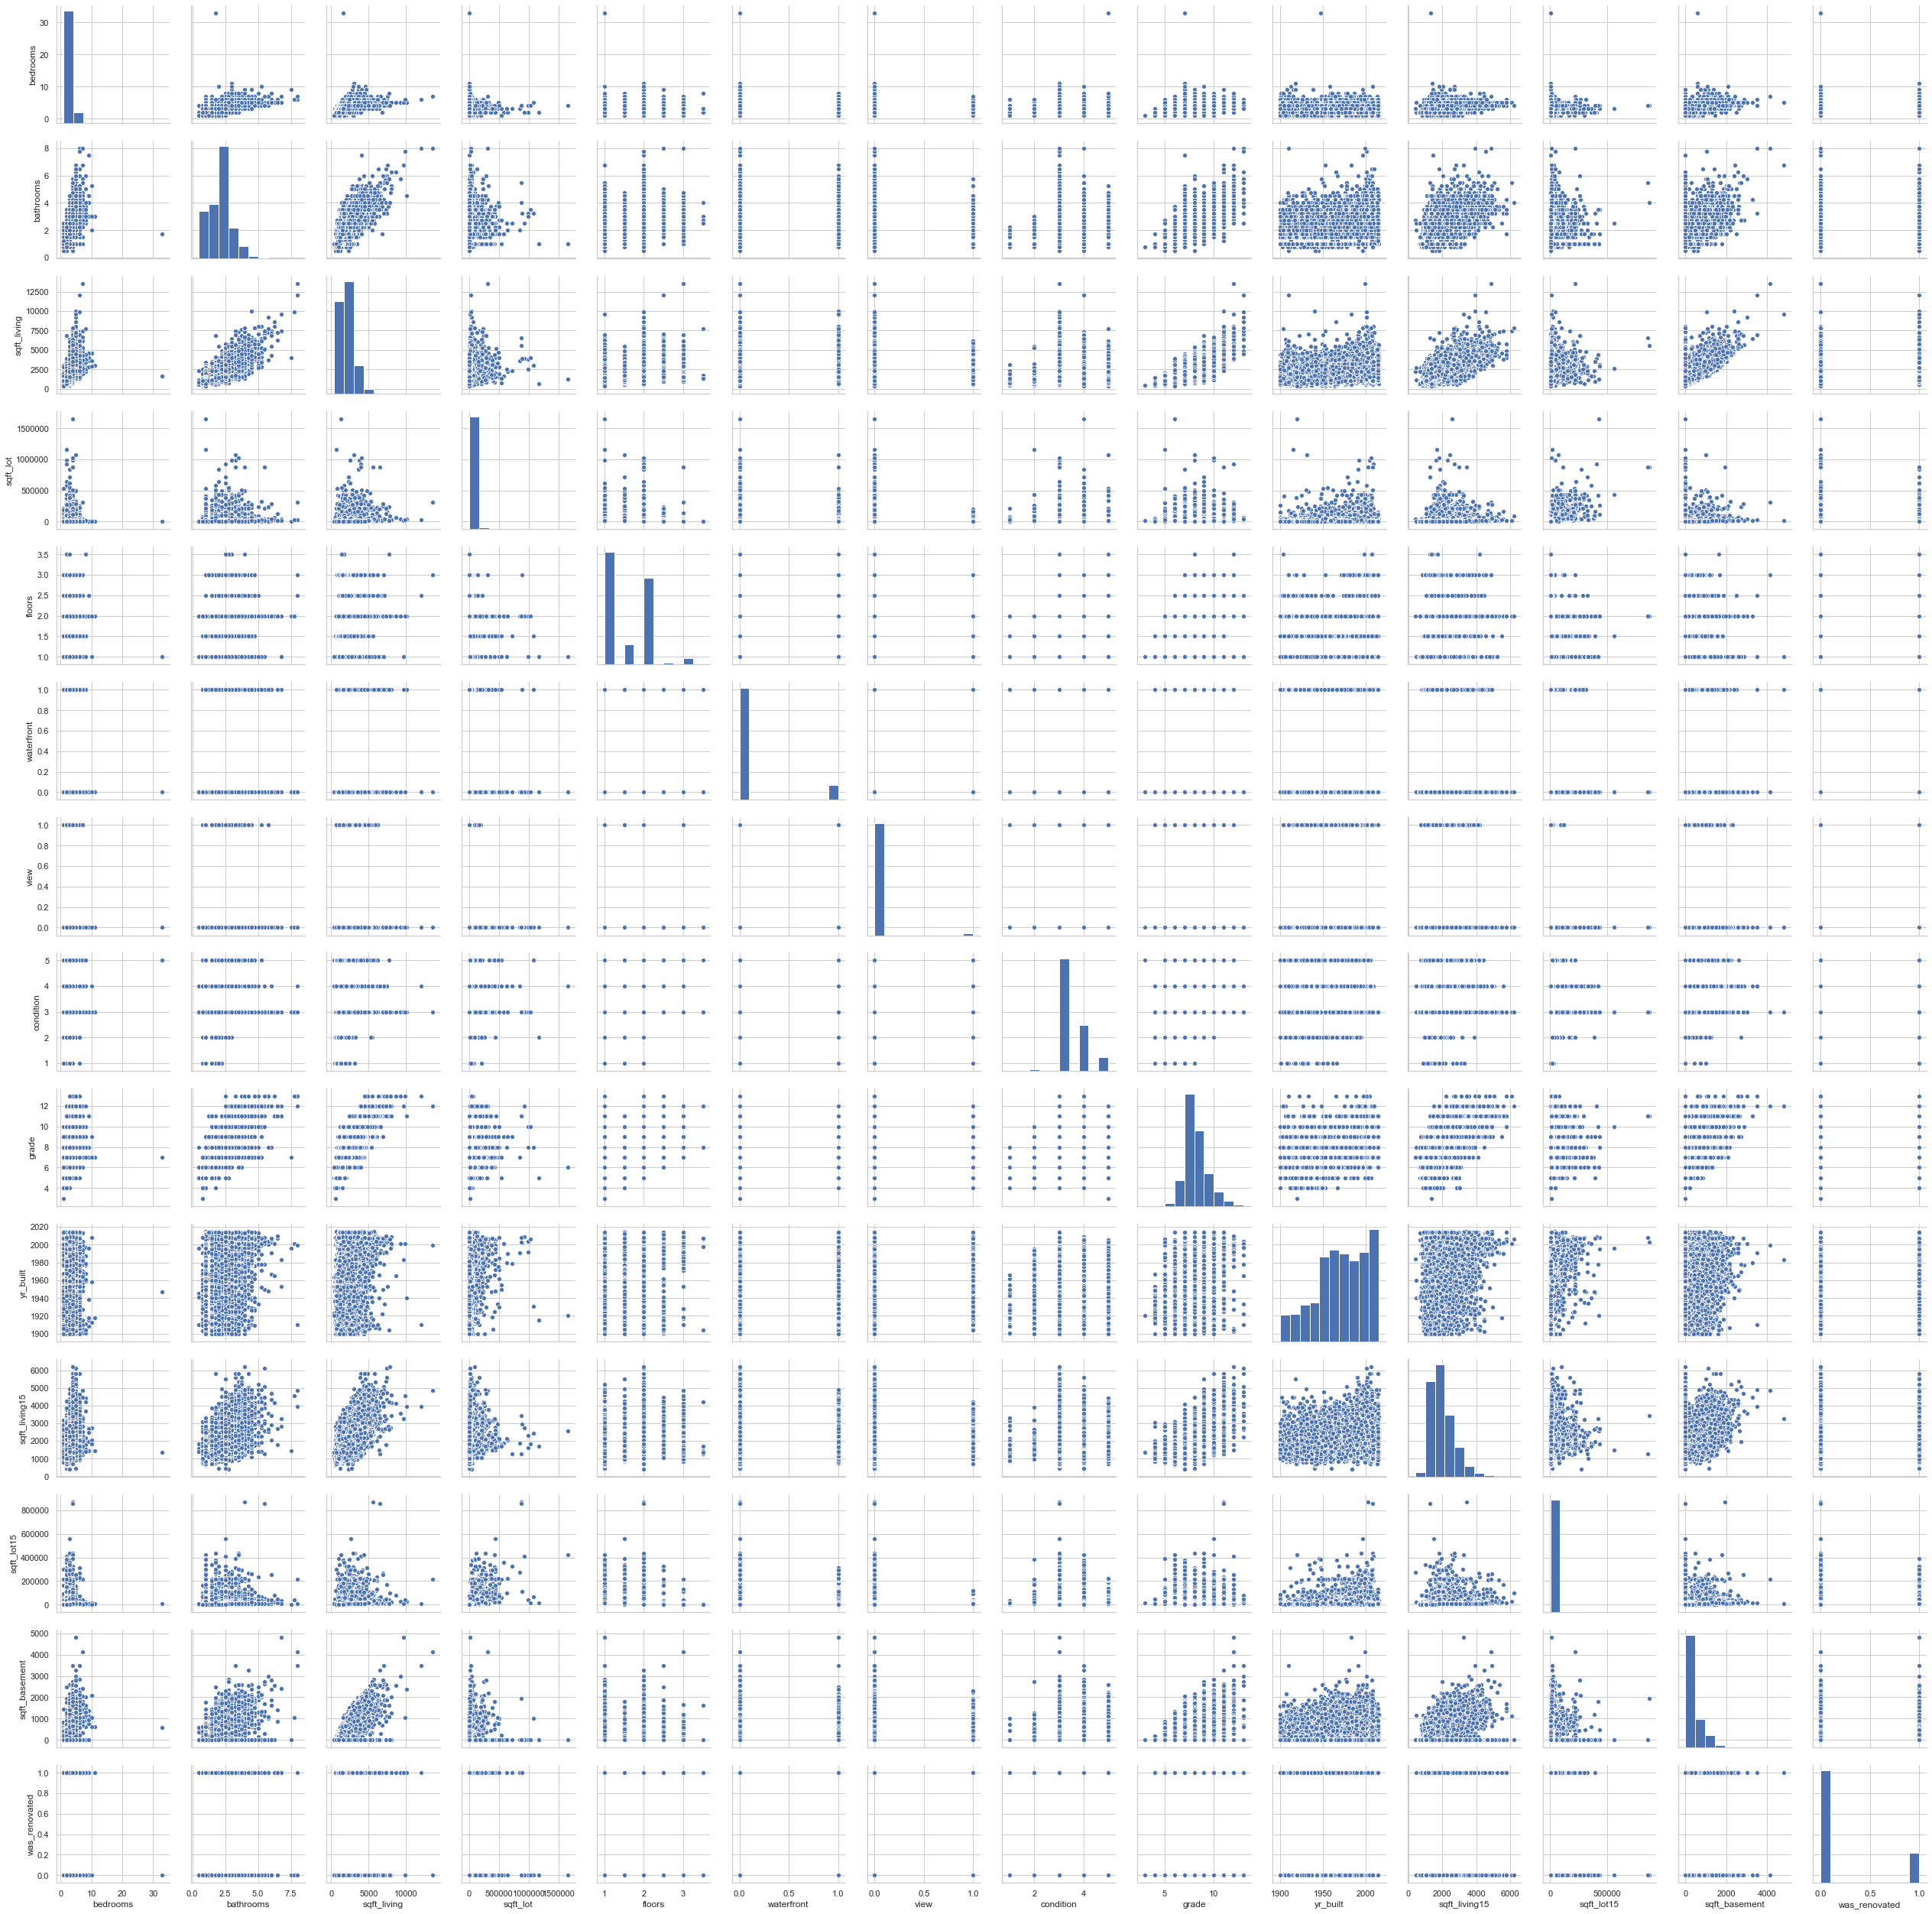

In [30]:
# View pairplot of main_df

sns.set(style="whitegrid")
sns.pairplot(main_df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'was_renovated']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D1E06BFC8>,
      dtype=object)

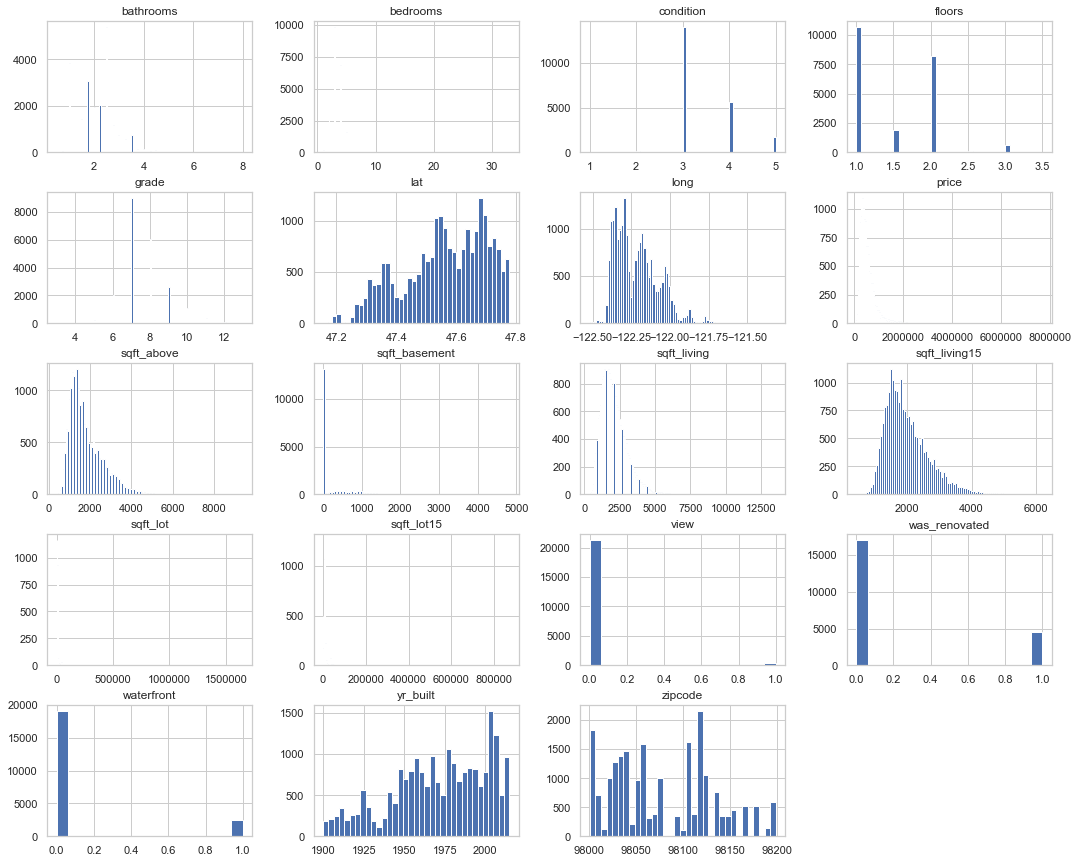

In [31]:
# Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

main_df.hist(figsize=(18,15),bins='auto')

# All the categorical features are ordinal except for zip code which is nominal and must be dealt with

[Text(0, 0.5, 'Price in Dollars'),
 Text(0.5, 0, 'Number of Bathrooms'),
 Text(0.5, 1.0, 'Price vs. No. of Bathrooms')]

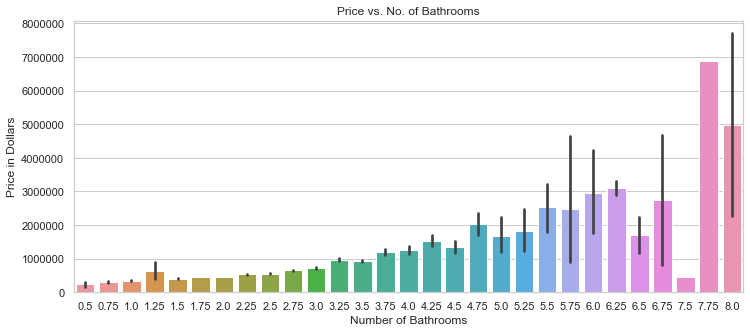

In [32]:
# Show the relationship between bathrooms and price

plt.figure(figsize=(12,5))
sns.barplot(x=main_df.bathrooms, y=main_df.price).set(title = 'Price vs. No. of Bathrooms', xlabel = 'Number of Bathrooms', ylabel = 'Price in Dollars')

[Text(0, 0.5, 'Price in Dollars'),
 Text(0.5, 0, 'Condition'),
 Text(0.5, 1.0, 'Price vs. Condition')]

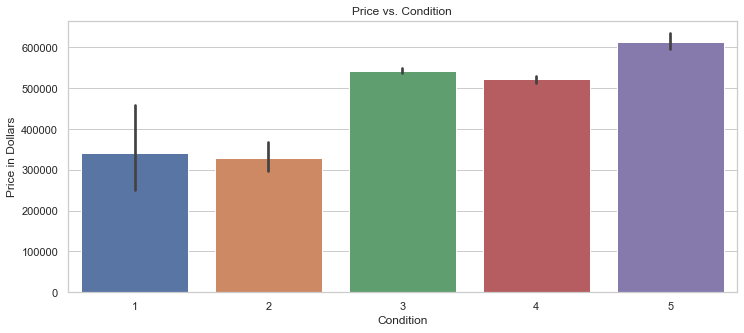

In [33]:
# Show the relationship between condition and price

plt.figure(figsize=(12,5))
sns.barplot(x=main_df.condition, y=main_df.price).set(title = 'Price vs. Condition', xlabel = 'Condition', ylabel = 'Price in Dollars')

In [34]:
# Create a dataframe with the 10 highest average priced zip codes

top_10_zipcodes = main_df.groupby(by='zipcode').mean().sort_values(by='price', ascending=False).head(10)

In [35]:
# Check out this dataframe

top_10_zipcodes

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15,sqft_basement,was_renovated
zipcode,,,,,,,,,,,,,,,,,,
98039,2.161300e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.120000,0.100000,3.480000,9.560000,3290.900000,1972.520000,47.625840,-122.233540,3132.200000,17291.100000,510.000000,0.380000
98004,1.356524e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.110410,0.053628,3.495268,8.687697,2419.842271,1971.470032,47.616183,-122.205189,2674.700315,12805.022082,489.179811,0.261830
98040,1.194874e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.166667,0.078014,3.787234,8.960993,2474.329787,1971.471631,47.559846,-122.225592,2898.744681,12801.283688,632.503546,0.248227
98112,1.096239e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.085502,0.007435,3.516729,8.442379,2005.695167,1944.449814,47.629619,-122.297866,2280.078067,4898.159851,493.048327,0.237918
98102,8.996077e+05,3.250000,2.283654,2151.048077,3605.153846,1.990385,0.144231,0.000000,3.375000,8.298077,1752.442308,1952.163462,47.634591,-122.322250,1954.471154,3303.500000,398.605769,0.298077
98109,8.800778e+05,3.192661,2.158257,2054.779817,3621.082569,1.729358,0.119266,0.000000,3.477064,8.018349,1637.348624,1944.027523,47.635602,-122.350092,1928.348624,3605.724771,417.431193,0.256881
98105,8.632289e+05,3.580786,2.159389,2150.576419,5121.165939,1.591703,0.091703,0.034934,3.628821,7.838428,1693.458515,1940.406114,47.665067,-122.294341,2028.624454,4939.017467,457.117904,0.240175
98006,8.599386e+05,3.841365,2.555723,2888.295181,13383.435743,1.459839,0.128514,0.018072,3.658635,8.795181,2300.383534,1978.720884,47.558022,-122.146839,2785.612450,12159.959839,587.911647,0.208835
98119,8.497148e+05,3.260870,2.224185,2005.614130,3615.217391,1.793478,0.103261,0.038043,3.375000,8.021739,1589.961957,1947.619565,47.640034,-122.366918,1865.434783,3727.494565,415.652174,0.277174


[Text(0, 0.5, 'Price in Dollars'),
 Text(0.5, 0, 'Zipcode'),
 Text(0.5, 1.0, 'Price vs. Zipcode')]

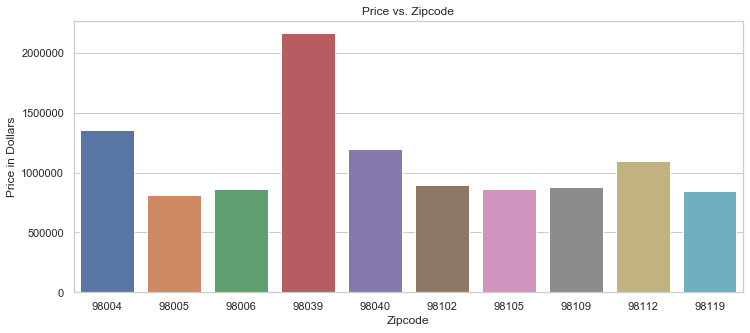

In [36]:
# Graph of highest priced 10 zip codes

plt.figure(figsize=(12,5))
sns.barplot(x=top_10_zipcodes.index, y=top_10_zipcodes.price).set(title = 'Price vs. Zipcode', xlabel = 'Zipcode', ylabel = 'Price in Dollars')

[Text(0, 0.5, 'Price in Dollars'),
 Text(0.5, 0, 'Waterfront'),
 Text(0.5, 1.0, 'Price vs. Waterfront')]

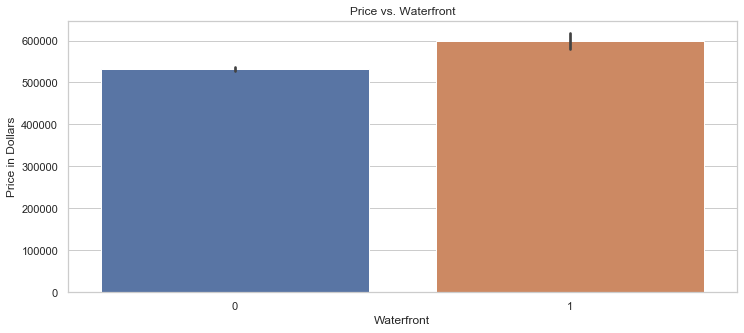

In [37]:
# Effect of waterfront on price of house

plt.figure(figsize=(12,5))
sns.barplot(x=main_df.waterfront, y=main_df.price).set(title = 'Price vs. Waterfront', xlabel = 'Waterfront', ylabel = 'Price in Dollars')

[Text(0, 0.5, 'Price in Dollars'),
 Text(0.5, 0, 'Number of Bedrooms'),
 Text(0.5, 1.0, 'Price vs. No. of Bedrooms')]

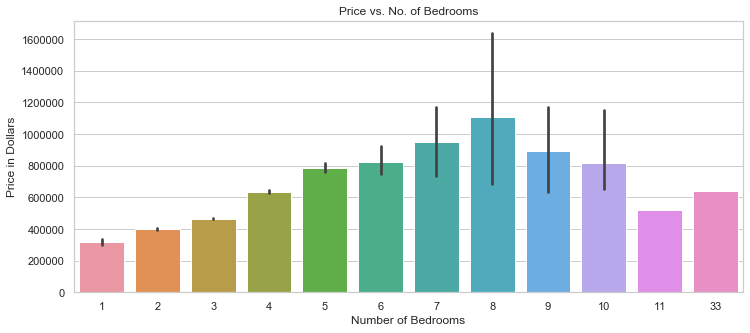

In [38]:
# Relationship between price and number of bedrooms

plt.figure(figsize=(12,5))
sns.barplot(x=main_df.bedrooms, y=main_df.price).set(title = 'Price vs. No. of Bedrooms', xlabel = 'Number of Bedrooms', ylabel = 'Price in Dollars')

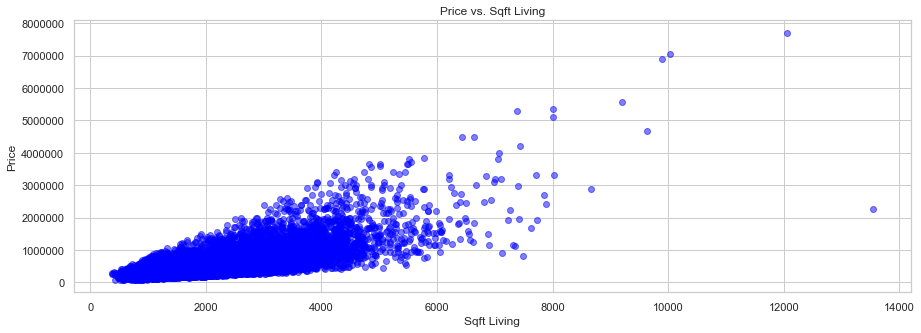

In [39]:
# View the relationship between sqft living and price

plt.figure(figsize = (15,5));
plt.scatter(main_df['sqft_living'],main_df['price'],alpha=0.5, color='blue')
plt.title("Price vs. Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Price")
sns.set(style="whitegrid")

plt.show();

[Text(0, 0.5, 'Price in Dollars'),
 Text(0.5, 0, 'Was Renovated'),
 Text(0.5, 1.0, 'Price vs. Was Renovated')]

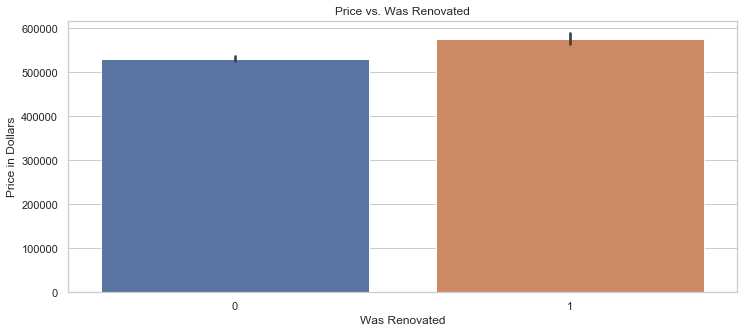

In [40]:
# Effect of renovation on price

plt.figure(figsize=(12,5))
sns.set(style="whitegrid")
sns.barplot(x=main_df.was_renovated, y=main_df.price).set(title = 'Price vs. Was Renovated', xlabel = 'Was Renovated', ylabel = 'Price in Dollars')

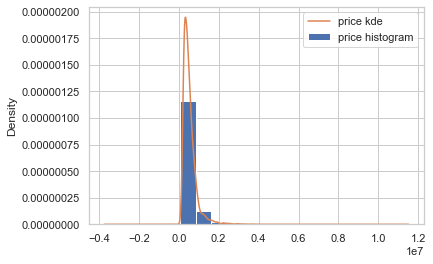

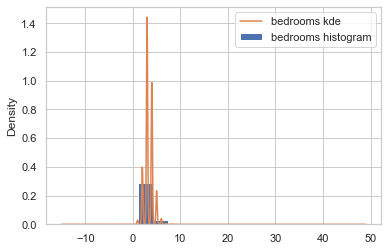

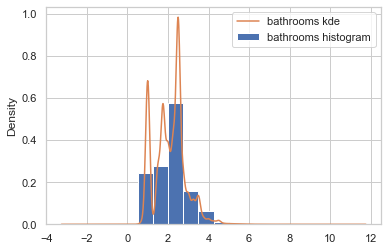

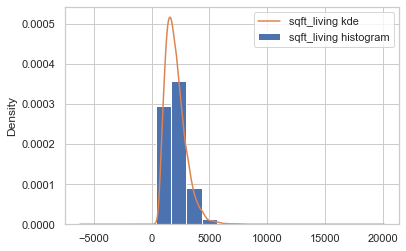

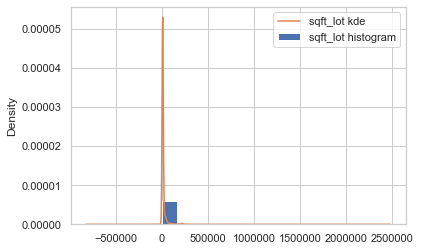

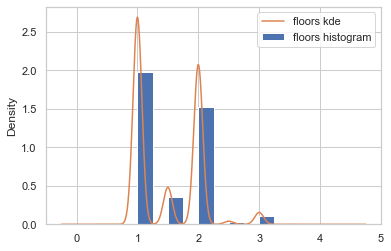

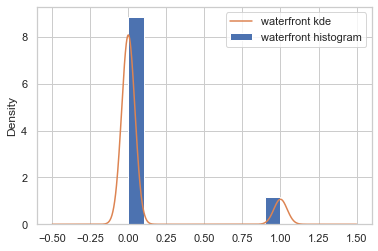

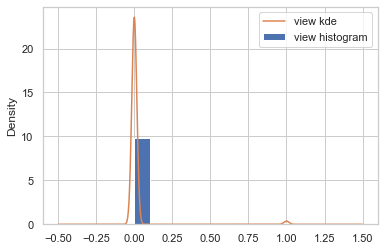

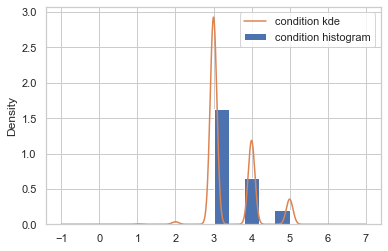

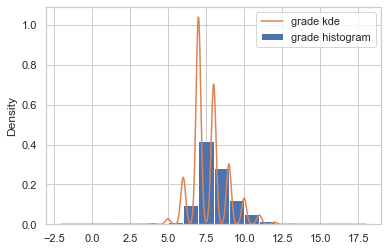

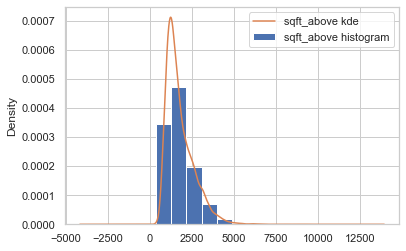

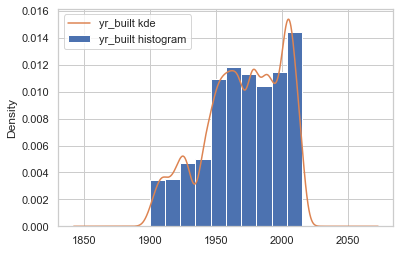

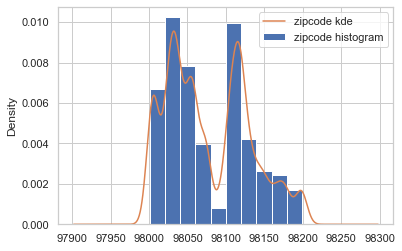

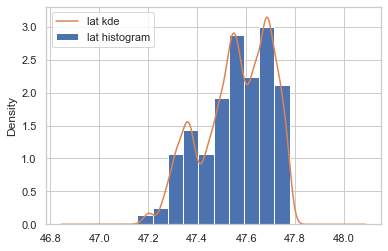

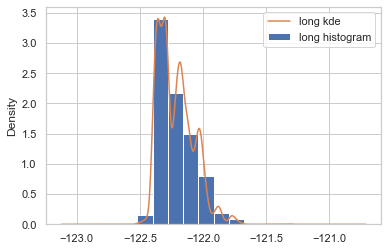

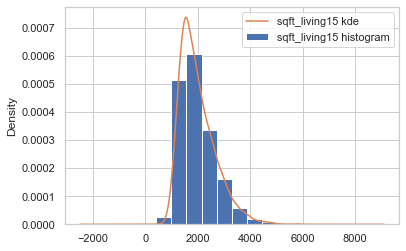

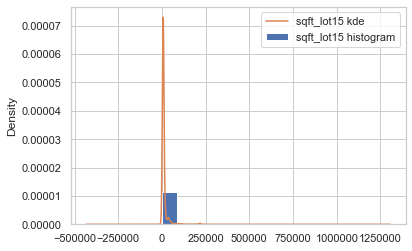

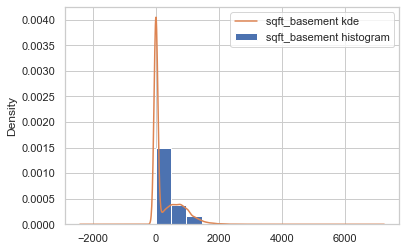

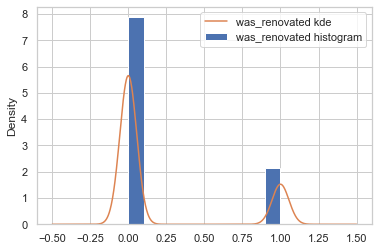

In [41]:
# Plot histograms with kde overlay to check the distribution of the predictors

for column in main_df:
    main_df[column].plot.hist(density=True, label = column+' histogram')
    main_df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()
    sns.set(style="whitegrid")

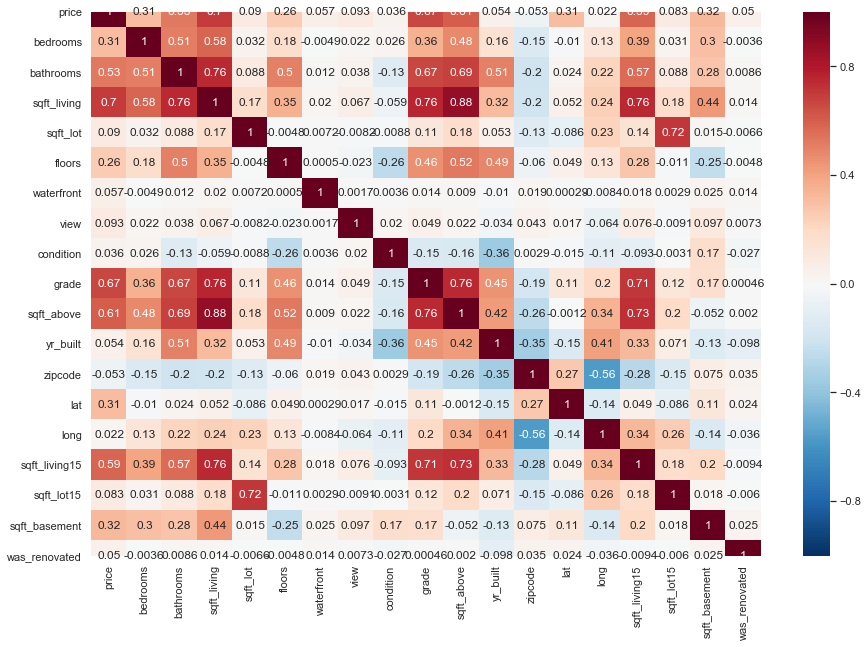

In [42]:
# Check for any high correlation values 

correlation = main_df.corr()
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [43]:
# To avoid multicollinearity, dropped the feature with the most > 0.7 correlations with other features

main_df.drop(columns='sqft_living', inplace=True)

In [44]:
# Convert the zipcode column into dummies and concat it with the main_df

zipcode_dummies = pd.get_dummies(main_df['zipcode'], prefix='zip', drop_first=True)

main_df = pd.concat([main_df, zipcode_dummies], axis=1)

# Drop the old zipcode column
main_df.drop(columns='zipcode', inplace = True)

In [45]:
# Creating a dictionary to save results of the models used

results = []

def model_results(model_name, model_desc, r2):
    models_dict = None
    models_dict = {'Model_Name': model_name,
                   'Model_Description': model_desc,
                   'R2_value': r2
                  }
    if models_dict not in results: results.append(models_dict)
    return results

In [46]:
# Drop lat and long columns

main_df.drop(columns=['lat','long'], inplace=True)

In [47]:
# Check that the columns were removed

main_df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,5650,1.0,1,0.0,3,7,1180,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7242,2.0,0,0.0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,0,0.0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5000,1.0,0,0.0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,8080,1.0,0,0.0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0


## Model

In [48]:
# OLS Modelling with all features

outcome = 'price'
predictors = main_df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

model = ols(formula=formula, data=main_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     846.6
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:08:34   Log-Likelihood:            -2.9172e+05
No. Observations:               21597   AIC:                         5.836e+05
Df Residuals:                   21513   BIC:                         5.843e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.839e+06   1.33e+05     13.797      0.000    1.58e+06     2.1e+06
bedrooms      -3.787e+04   1695.864    -22.330      0.000   -4.12e+04   -3.45e+04
bathrooms      2.958e+04   2895.627     10.215      0.000    2.39e+04    3.53e+04
sqft_lot          0.2419      0.043      5.683      0.000       0.158       0.325
floors        -3.335e+04   3492.750     -9.548      0.000   -4.02e+04   -2.65e+04
waterfront      4.69e+04   3789.119     12.377      0.000    3.95e+04    5.43e+04
view           2.676e+04   1.01e+04      2.656      0.008    7012.301    4.65e+04
condition       2.41e+04   2105.982     11.442      0.000       2e+04    2.82e+04
grade          6.715e+04   2011.003     33.390      0.000    6.32e+04    7.11e+04
sqft_above      211.4453      3.357     62.985      0.000     204.865     218.025
yr_built      -1244.9336     68.424    -18.194      0.000   -1379.050   -1110.817
sqft_living15    28.4617      3.157      9.015      0.000      22.273      34.650
sqft_lot15       -0.1565      0.067     -2.335      0.020      -0.288      -0.025
sqft_basement   160.3573      3.895     41.166      0.000     152.722     167.993
was_renovated  1.184e+04   3003.727      3.941      0.000    5950.169    1.77e+04
zip_98002      3.247e+04   1.58e+04      2.057      0.040    1535.324    6.34e+04
zip_98003     -1.692e+04   1.42e+04     -1.190      0.234   -4.48e+04    1.09e+04
zip_98004      7.458e+05   1.39e+04     53.565      0.000    7.18e+05    7.73e+05
zip_98005      2.641e+05   1.68e+04     15.717      0.000    2.31e+05    2.97e+05
zip_98006      2.534e+05   1.26e+04     20.133      0.000    2.29e+05    2.78e+05
zip_98007      2.199e+05   1.78e+04     12.377      0.000    1.85e+05    2.55e+05
zip_98008      2.741e+05   1.42e+04     19.271      0.000    2.46e+05    3.02e+05
zip_98010      6.274e+04   2.02e+04      3.101      0.002    2.31e+04    1.02e+05
zip_98011      1.025e+05   1.59e+04      6.456      0.000    7.14e+04    1.34e+05
zip_98014       9.89e+04   1.89e+04      5.240      0.000    6.19e+04    1.36e+05
zip_98019      7.878e+04   1.61e+04      4.906      0.000    4.73e+04     1.1e+05
zip_98022      1.523e+04   1.52e+04      1.005      0.315   -1.45e+04    4.49e+04
zip_98023      -3.73e+04   1.23e+04     -3.024      0.002   -6.15e+04   -1.31e+04
zip_98024      1.487e+05   2.23e+04      6.668      0.000    1.05e+05    1.92e+05
zip_98027      1.467e+05   1.29e+04     11.330      0.000    1.21e+05    1.72e+05
zip_98028      1.108e+05   1.42e+04      7.813      0.000     8.3e+04    1.39e+05
zip_98029      1.919e+05   1.38e+04     13.924      0.000    1.65e+05    2.19e+05
zip_98030       121.7243   1.46e+04      0.008      0.993   -2.84e+04    2.87e+04
zip_98031      5548.2008   1.43e+04      0.388      0.698   -2.25e+04    3.36e+04
zip_98032      4163.0954   1.85e+04      0.225   

In [49]:
# Base Model

y = main_df[['price']]
X = main_df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, main_df['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)

model_results('Baseline Model', 'All features', test_r_squared)

Train RMSE score is : 175964.623845963
Test RMSE score is : 184252.802475401
Train R2 value: 0.7676888040300762
Test R2 value: 0.7574317330543702


[{'Model_Name': 'Baseline Model',
  'Model_Description': 'All features',
  'R2_value': 0.7574317330543702}]

In [50]:
# Drop all predictors with a p value of higher than 0.05

main_df.drop(columns=['zip_98003', 'zip_98022', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98042', 'zip_98058'], inplace = True)

In [51]:
# Check that the columns were dropped

main_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'sqft_basement', 'was_renovated', 'zip_98002',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105',
       'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112',
       'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119',
       'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136',
       'zip_98144', 'zip_98146', 'zip_98148', 'zip_9815

In [52]:
# Model 1 after dropping features with a p value of > 0.05

outcome1 = 'price'
predictors_1 = main_df.drop('price', axis=1)
pred_sum_1 = '+'.join(predictors_1.columns)
formula = outcome1 + '~' + pred_sum_1

model1 = ols(formula=formula, data=main_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     924.5
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:08:35   Log-Likelihood:            -2.9173e+05
No. Observations:               21597   AIC:                         5.836e+05
Df Residuals:                   21520   BIC:                         5.842e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.84e+06   1.33e+05     13.861      0.000    1.58e+06     2.1e+06
bedrooms      -3.785e+04   1695.168    -22.326      0.000   -4.12e+04   -3.45e+04
bathrooms      2.955e+04   2893.814     10.211      0.000    2.39e+04    3.52e+04
sqft_lot          0.2461      0.042      5.792      0.000       0.163       0.329
floors        -3.329e+04   3491.850     -9.534      0.000   -4.01e+04   -2.64e+04
waterfront     4.701e+04   3788.530     12.409      0.000    3.96e+04    5.44e+04
view            2.64e+04   1.01e+04      2.621      0.009    6658.981    4.61e+04
condition      2.429e+04   2100.841     11.561      0.000    2.02e+04    2.84e+04
grade          6.706e+04   2006.561     33.421      0.000    6.31e+04     7.1e+04
sqft_above      211.4886      3.355     63.033      0.000     204.912     218.065
yr_built      -1244.1148     68.280    -18.221      0.000   -1377.949   -1110.281
sqft_living15    28.5188      3.154      9.041      0.000      22.336      34.702
sqft_lot15       -0.1509      0.067     -2.259      0.024      -0.282      -0.020
sqft_basement   160.2583      3.892     41.171      0.000     152.629     167.888
was_renovated  1.198e+04   3002.643      3.990      0.000    6093.897    1.79e+04
zip_98002      2.938e+04   1.32e+04      2.229      0.026    3545.591    5.52e+04
zip_98004      7.428e+05   1.09e+04     68.452      0.000    7.22e+05    7.64e+05
zip_98005       2.61e+05   1.43e+04     18.191      0.000    2.33e+05    2.89e+05
zip_98006      2.504e+05   9059.492     27.644      0.000    2.33e+05    2.68e+05
zip_98007      2.168e+05   1.55e+04     14.009      0.000    1.86e+05    2.47e+05
zip_98008      2.711e+05   1.12e+04     24.109      0.000    2.49e+05    2.93e+05
zip_98010      5.925e+04   1.83e+04      3.246      0.001    2.35e+04     9.5e+04
zip_98011      9.948e+04   1.33e+04      7.489      0.000    7.34e+04    1.26e+05
zip_98014      9.517e+04   1.67e+04      5.692      0.000    6.24e+04    1.28e+05
zip_98019       7.55e+04   1.35e+04      5.592      0.000     4.9e+04    1.02e+05
zip_98023     -4.028e+04   8752.873     -4.602      0.000   -5.74e+04   -2.31e+04
zip_98024      1.449e+05   2.05e+04      7.068      0.000    1.05e+05    1.85e+05
zip_98027      1.435e+05   9573.325     14.994      0.000    1.25e+05    1.62e+05
zip_98028      1.078e+05   1.12e+04      9.620      0.000    8.58e+04     1.3e+05
zip_98029       1.89e+05   1.07e+04     17.668      0.000    1.68e+05     2.1e+05
zip_98033      3.532e+05   9345.130     37.794      0.000    3.35e+05    3.72e+05
zip_98034      2.007e+05   8449.792     23.747      0.000    1.84e+05    2.17e+05
zip_98038      2.038e+04   8232.445      2.475      0.013    4239.985    3.65e+04
zip_98039      1.279e+06   2.57e+04     49.737      0.000    1.23e+06    1.33e+06
zip_98040       5.15e+05   1.15e+04     44.614   

In [53]:
# Model 1

y = main_df[['price']]
X = main_df.drop(['price'], axis=1)

predictors = main_df.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, main_df['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)

model_results('Model 1', 'All features minus p value of > 0.05', test_r_squared)

Train RMSE score is : 180147.98357892054
Test RMSE score is : 171971.6905699883
Train R2 value: 0.7653017463620566
Test R2 value: 0.7632724515168414


[{'Model_Name': 'Baseline Model',
  'Model_Description': 'All features',
  'R2_value': 0.7574317330543702},
 {'Model_Name': 'Model 1',
  'Model_Description': 'All features minus p value of > 0.05',
  'R2_value': 0.7632724515168414}]

In [54]:
# Create a copy of the main_df dataframe before making any changes

main_df2 = main_df.copy()

In [55]:
# Filtering the dataframe to the IQR of price

Q1 = main_df2['price'].quantile(0.25)
Q3 = main_df2['price'].quantile(0.75)
IQR = Q3 - Q1

filtered_df = (main_df2['price'] >= Q1 - 1.5 * IQR) & (main_df2['price'] <= Q3 + 1.5 * IQR)
total_df_filtered = main_df2.loc[filtered_df] 

In [56]:
# Scaling the data 

scaler = MinMaxScaler()

total_df_filtered2 = total_df_filtered.copy()
total_df_filtered2[total_df_filtered2.columns] = scaler.fit_transform(total_df_filtered2[total_df_filtered2.columns])

In [57]:
# Model 2 taking only the IQR of price

outcome2 = 'price'
predictors_2 = total_df_filtered2.drop('price', axis=1)
pred_sum_2 = '+'.join(predictors_2.columns)
formula = outcome2 + '~' + pred_sum_2

model2 = ols(formula=formula, data=total_df_filtered2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1233.
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:08:37   Log-Likelihood:                 21562.
No. Observations:               20439   AIC:                        -4.297e+04
Df Residuals:                   20362   BIC:                        -4.236e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.2108      0.005    -40.838      0.000      -0.221      -0.201
bedrooms         -0.1794      0.027     -6.619      0.000      -0.233      -0.126
bathrooms         0.1122      0.010     11.071      0.000       0.092       0.132
sqft_lot          0.4770      0.035     13.688      0.000       0.409       0.545
floors           -0.0314      0.004     -7.222      0.000      -0.040      -0.023
waterfront        0.0064      0.002      3.451      0.001       0.003       0.010
view              0.0398      0.005      7.614      0.000       0.030       0.050
condition         0.0875      0.004     21.264      0.000       0.079       0.096
grade             0.3946      0.009     43.446      0.000       0.377       0.412
sqft_above        0.5585      0.010     57.549      0.000       0.539       0.578
yr_built         -0.0732      0.004    -18.724      0.000      -0.081      -0.066
sqft_living15     0.2101      0.008     25.268      0.000       0.194       0.226
sqft_lot15        0.0020      0.029      0.069      0.945      -0.054       0.058
sqft_basement     0.1862      0.006     33.322      0.000       0.175       0.197
was_renovated     0.0065      0.001      4.427      0.000       0.004       0.009
zip_98002         0.0005      0.006      0.074      0.941      -0.012       0.013
zip_98004         0.4676      0.007     66.149      0.000       0.454       0.481
zip_98005         0.2923      0.007     41.035      0.000       0.278       0.306
zip_98006         0.2469      0.005     53.281      0.000       0.238       0.256
zip_98007         0.2275      0.007     30.592      0.000       0.213       0.242
zip_98008         0.2227      0.005     40.651      0.000       0.212       0.233
zip_98010         0.0726      0.009      8.388      0.000       0.056       0.090
zip_98011         0.1237      0.006     19.649      0.000       0.111       0.136
zip_98014         0.0958      0.008     11.977      0.000       0.080       0.111
zip_98019         0.0831      0.006     12.982      0.000       0.071       0.096
zip_98023        -0.0312      0.004     -7.501      0.000      -0.039      -0.023
zip_98024         0.1332      0.010     13.148      0.000       0.113       0.153
zip_98027         0.1658      0.005     35.840      0.000       0.157       0.175
zip_98028         0.1168      0.005     21.933      0.000       0.106       0.127
zip_98029         0.2065      0.005     40.257      0.000       0.196       0.217
zip_98033         0.2965      0.005     62.579      0.000       0.287       0.306
zip_98034         0.1685      0.004     41.460      0.000       0.161       0.176
zip_98038         0.0263      0.004      6.728      0.000       0.019       0.034
zip_98039         0.5916      0.035     17.135      0.000       0.524       0.659
zip_98040         0.3778      0.007     54.769   

In [58]:
# Model 2

y = total_df_filtered2[['price']]
X = total_df_filtered2.drop(['price'], axis=1)

predictors = total_df_filtered2.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, total_df_filtered2['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)

model_results('Model 2', 'IQR of Price', test_r_squared)

coefficients = pd.DataFrame(linreg.coef_,X.columns)
coefficients.columns = ['Coefficient']
coefficients = coefficients.loc[['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 'sqft_basement', 'was_renovated']]

coefficients

Train RMSE score is : 0.08461297159423642
Test RMSE score is : 0.08332912632748664
Train R2 value: 0.8188101234644998
Test R2 value: 0.8286122604498339


,Coefficient
bedrooms,-0.191820
bathrooms,0.105261
sqft_lot,0.442425
floors,-0.031368
waterfront,0.006648
view,0.034985
condition,0.086557
grade,0.393452
sqft_above,0.561052
yr_built,-0.071529


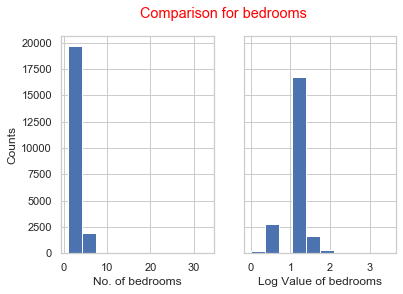

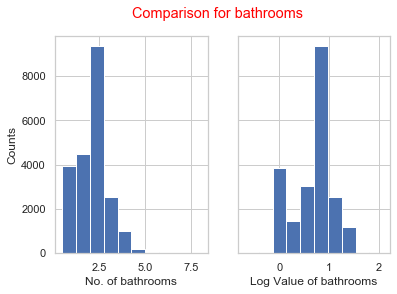

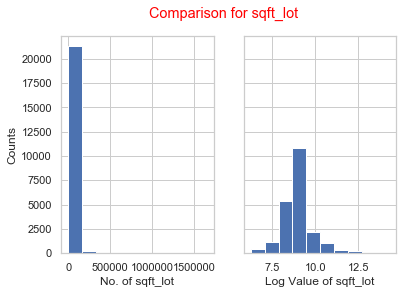

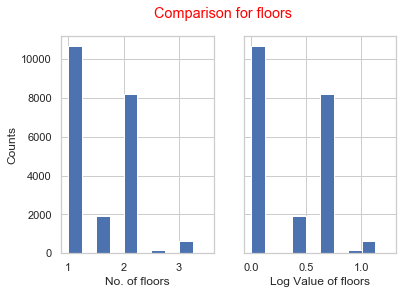

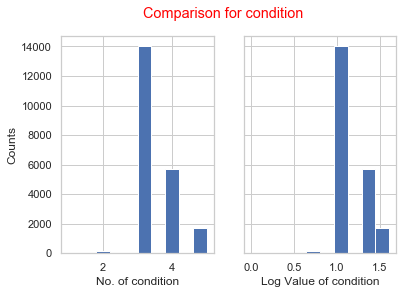

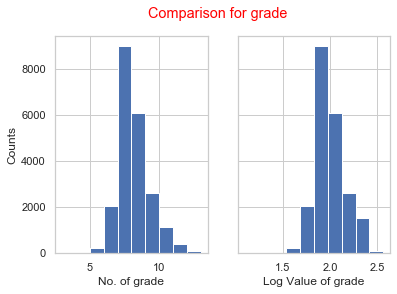

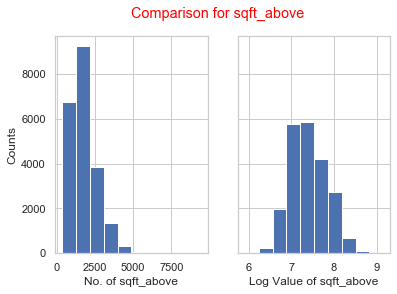

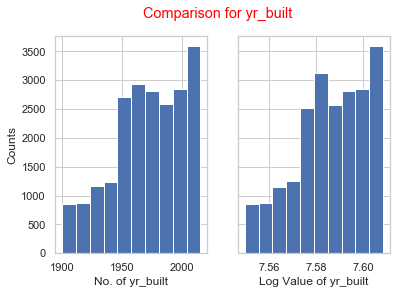

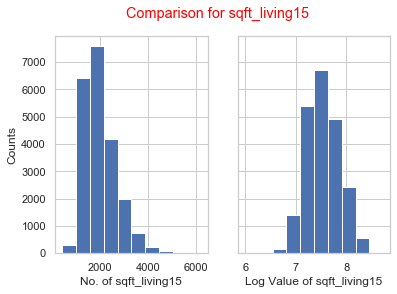

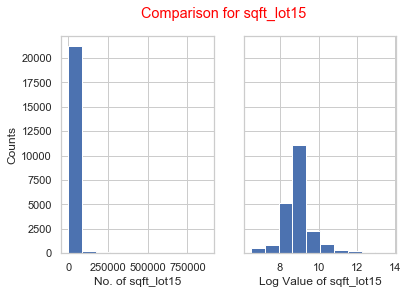

In [59]:
# Compare predictors before and after log transformation

def plotting_histo(data_param, col_param):
    for x in col_param:
        fig, ax = plt.subplots(1,2,sharey=True)
        ax[0].hist(data_param[x])
        ax[0].set_ylabel("Counts")
        ax[0].set_xlabel("No. of "+x)
    
        ax[1].hist(data_param[x].apply(np.log))
        ax[1].set_xlabel("Log Value of "+x)

        plt.suptitle("Comparison for "+x,color='red')
        plt.show();

colList= ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built',
          'sqft_living15', 'sqft_lot15']
plotting_histo(main_df,colList)

# bedrooms, bathrooms, sqft_lot, grade, sqft_above, sqft_living15, sqft_lot15 benefited from the log transformation

In [60]:
# Checking names of columns of main_df2

main_df2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'sqft_basement', 'was_renovated', 'zip_98002',
       'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008',
       'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105',
       'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112',
       'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119',
       'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136',
       'zip_98144', 'zip_98146', 'zip_98148', 'zip_9815

In [61]:
# Log transforming the following features: 
# bedrooms, bathrooms, sqft_lot, grade, sqft_above, sqft_living15, sqft_lot15

columns_log_transform = ['bedrooms', 'bathrooms', 'sqft_lot', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15']

for feature in columns_log_transform:
    main_df2[feature] = main_df2[feature].apply(np.log)

In [62]:
# Check if log transformation was successful

main_df2

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,1.098612,0.000000,8.639411,1.0,1,0.0,3,1.945910,7.073270,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,1.098612,0.810930,8.887653,2.0,0,0.0,3,1.945910,7.682482,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,0.693147,0.000000,9.210340,1.0,0,0.0,3,1.791759,6.646391,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,1.386294,1.098612,8.517193,1.0,0,0.0,5,1.945910,6.956545,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,1.098612,0.693147,8.997147,1.0,0,0.0,3,2.079442,7.426549,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,1.098612,0.916291,7.030857,3.0,0,0.0,3,2.079442,7.333023,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,1.386294,0.916291,8.667852,2.0,0,0.0,3,2.079442,7.745003,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,0.693147,-0.287682,7.207860,2.0,0,0.0,3,1.945910,6.927558,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,1.098612,0.916291,7.778211,2.0,1,0.0,3,2.079442,7.377759,...,0,0,0,0,0,0,0,0,0,0


In [63]:
# Model 3 after performing log transformations

outcome3 = 'price'
predictors_3 = main_df2.drop('price', axis=1)
pred_sum_3 = '+'.join(predictors_3.columns)
formula = outcome3 + '~' + pred_sum_3

model3 = ols(formula=formula, data=main_df2).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     723.0
Date:                Mon, 04 May 2020   Prob (F-statistic):               0.00
Time:                        12:08:44   Log-Likelihood:            -2.9370e+05
No. Observations:               21597   AIC:                         5.876e+05
Df Residuals:                   21520   BIC:                         5.882e+05
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.309e+06   1.66e+05    -13.910      0.000   -2.63e+06   -1.98e+06
bedrooms      -1.284e+05   6361.731    -20.177      0.000   -1.41e+05   -1.16e+05
bathrooms      3692.2523   6121.347      0.603      0.546   -8306.042    1.57e+04
sqft_lot       4.165e+04   3928.214     10.604      0.000     3.4e+04    4.94e+04
floors         7715.9277   4037.016      1.911      0.056    -196.922    1.56e+04
waterfront     4.799e+04   4150.516     11.563      0.000    3.99e+04    5.61e+04
view           2.462e+04    1.1e+04      2.230      0.026    2982.642    4.63e+04
condition      2.098e+04   2310.991      9.079      0.000    1.65e+04    2.55e+04
grade           5.92e+05   1.66e+04     35.559      0.000    5.59e+05    6.25e+05
sqft_above     3.401e+05   7391.537     46.014      0.000    3.26e+05    3.55e+05
yr_built       -923.8589     77.826    -11.871      0.000   -1076.404    -771.314
sqft_living15  5.562e+04   7037.880      7.903      0.000    4.18e+04    6.94e+04
sqft_lot15    -3073.5460   4314.731     -0.712      0.476   -1.15e+04    5383.647
sqft_basement   168.7730      4.176     40.419      0.000     160.589     176.957
was_renovated  1.328e+04   3290.224      4.037      0.000    6833.127    1.97e+04
zip_98002      5.291e+04   1.45e+04      3.655      0.000    2.45e+04    8.13e+04
zip_98004      7.912e+05   1.19e+04     66.532      0.000    7.68e+05    8.14e+05
zip_98005      2.737e+05   1.57e+04     17.413      0.000    2.43e+05    3.04e+05
zip_98006      2.852e+05   9890.027     28.837      0.000    2.66e+05    3.05e+05
zip_98007       2.22e+05    1.7e+04     13.083      0.000    1.89e+05    2.55e+05
zip_98008      2.828e+05   1.23e+04     22.913      0.000    2.59e+05    3.07e+05
zip_98010      5.593e+04      2e+04      2.791      0.005    1.66e+04    9.52e+04
zip_98011       1.03e+05   1.46e+04      7.073      0.000    7.44e+04    1.32e+05
zip_98014      8.415e+04   1.83e+04      4.605      0.000    4.83e+04     1.2e+05
zip_98019      5.842e+04   1.48e+04      3.951      0.000    2.94e+04    8.74e+04
zip_98023     -3.116e+04   9592.089     -3.249      0.001      -5e+04   -1.24e+04
zip_98024      1.525e+05   2.24e+04      6.797      0.000    1.09e+05    1.96e+05
zip_98027      1.509e+05   1.05e+04     14.409      0.000     1.3e+05    1.71e+05
zip_98028       1.05e+05   1.23e+04      8.554      0.000     8.1e+04    1.29e+05
zip_98029      2.029e+05   1.18e+04     17.220      0.000     1.8e+05    2.26e+05
zip_98033      3.786e+05   1.03e+04     36.927      0.000    3.58e+05    3.99e+05
zip_98034      2.118e+05   9271.478     22.840      0.000    1.94e+05     2.3e+05
zip_98038       1.94e+04   9018.147      2.151      0.031    1720.923    3.71e+04
zip_98039      1.419e+06   2.81e+04     50.478      0.000    1.36e+06    1.47e+06
zip_98040      5.558e+05   1.26e+04     44.027   

In [64]:
# Model 3

y = main_df2[['price']]
X = main_df2.drop(['price'], axis=1)

predictors = main_df2.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, main_df2['price'], test_size=0.25)

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_train_hat = linreg.predict(X_train)
y_test_hat = linreg.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_hat))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

print('Train RMSE score is :',train_rmse)
print('Test RMSE score is :',test_rmse)
train_r_squared = r2_score(y_train, y_train_hat)
test_r_squared = r2_score(y_test, y_test_hat)
print('Train R2 value:',train_r_squared)
print('Test R2 value:',test_r_squared)

model_results('Model 3', 'Log Transformed Some Features', test_r_squared)

Train RMSE score is : 193751.4491009516
Test RMSE score is : 198950.6394491494
Train R2 value: 0.719147349903253
Test R2 value: 0.7148443918469172


[{'Model_Name': 'Baseline Model',
  'Model_Description': 'All features',
  'R2_value': 0.7574317330543702},
 {'Model_Name': 'Model 1',
  'Model_Description': 'All features minus p value of > 0.05',
  'R2_value': 0.7632724515168414},
 {'Model_Name': 'Model 2',
  'Model_Description': 'IQR of Price',
  'R2_value': 0.8286122604498339},
 {'Model_Name': 'Model 3',
  'Model_Description': 'Log Transformed Some Features',
  'R2_value': 0.7148443918469172}]

In [65]:
# Converting the results list to a dataframe

results_dataframe = pd.DataFrame(data=results)

In [66]:
# Viewing the newly formed dataframe

results_dataframe

# Model 2 has the highest R^2 value

,Model_Name,Model_Description,R2_value
0,Baseline Model,All features,0.757432
1,Model 1,All features minus p value of > 0.05,0.763272
2,Model 2,IQR of Price,0.828612
3,Model 3,Log Transformed Some Features,0.714844


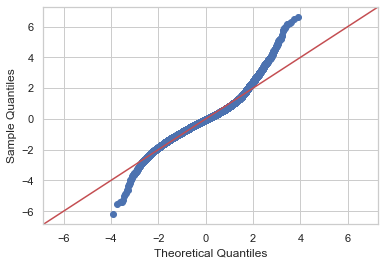

In [67]:
# Checking the normality assumption with a QQ Plot

fig = sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

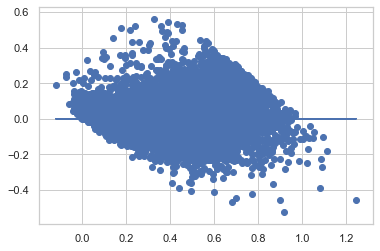

In [68]:
# Checking for the third assumption of creating a linear regression model: Homoscedasticity 

plt.scatter(model2.predict(predictors_2), model2.resid)
plt.plot(model2.predict(predictors_2), [0 for i in range(len(predictors_2))]);

## Interpret 

In [69]:
results_dataframe.iloc[2]

Model_Name                Model 2
Model_Description    IQR of Price
R2_value                 0.828612
Name: 2, dtype: object

In [70]:
coefficients

,Coefficient
bedrooms,-0.191820
bathrooms,0.105261
sqft_lot,0.442425
floors,-0.031368
waterfront,0.006648
view,0.034985
condition,0.086557
grade,0.393452
sqft_above,0.561052
yr_built,-0.071529


Model 2 was the best model with the highest R^2 value, the coefficient of determination, with a value of 0.819681. That means that there is 81.9681% less variation around the best fit line than the mean. 

In addition, model 2 had the coefficients in the above dataframe, with sqft_above having the highest coefficient of 0.553068 after scaling. 

Model 2 contained the following features: bedrooms, bathrooms, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, yr_built, sqft_living15, sqft_lot15, sqft_basement, was_renovated, and zipcode. 

OneHotEncoding was applied to zipcodes since it is a nominal variable and thus has no order. Ordinal features were left as integers since they have a clear order. 

### 1) Does renovation raise the value of a house?

According to the Price vs. Was Renovated bar graph, renovation alone does slightly increase the average price of a house. However, the increase is not substantial enough to definitively support renovation before selling a house, unless that renovation increases the condition rating of the house. 

### 2) Does the number of bathrooms and/or bedrooms affect the value of a house?

According to the Price vs. No. of Bathrooms bar graph, the greater the number of bathrooms in a house, the higher the price. Therefore, if the house is being sold, it may be a good idea to add bathrooms to increase the value of the house. According to the Price vs. No. of Bedrooms bar graph, the greater the number of bedrooms (up until 8), the greater the price. So adding bedrooms could also increase the value of the house if it is being sold.

### 3) Is the living sqft of a house correlated with its price?

According to the Price vs. Sqft Living scatter plot, there is a positive correlation between the living sqft of a house and its price. 

### 4) Does being on the water increase the value of a house?

According to the Price vs. Waterfront bar graph, a house on the water has a higher average price than a house that is not on the water. However, there is not a significant difference between them. 